In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPool2D,BatchNormalization
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import cv2
import time

np.random.seed(1)

In [2]:
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please ensure you have installed TensorFlow correctly')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

Default GPU Device: /device:GPU:0


In [3]:
target_shape = (200,200)
train_imgs = []
train_labels = []
train_file = './train_zip/train'

for file in os.listdir(train_file):
#     if the file have jpg its an image
    if file.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_file,file))
#         converting images to rgb 
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#       appending labels
        train_labels.append(file.split('_')[0])
#       resizing images
        img = cv2.resize(img,target_shape)
        train_imgs.append(img)

# converting labesls to one hot encoded  
train_labels = pd.get_dummies(train_labels).values
train_imgs = np.array(train_imgs)

# spliting data into train and valid sets
x_train,x_valid,y_train,y_valid = train_test_split(train_imgs,train_labels,random_state=1,test_size=0.2)

In [4]:
test_imgs = []
test_labels = []
test_file = "./test_zip/test"

for file in os.listdir(test_file):
    if file.split(".")[1] == "jpg":
#       if the file have jpg its an image
        img = cv2.imread(os.path.join(test_file,file))
    #   converting images to rgb 
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        # appending labels
        test_labels.append(file.split("_")[0])
        img = cv2.resize(img,target_shape)
        test_imgs.append(img)
        
# converting labesls to one hot encoded          
test_labels = pd.get_dummies(test_labels).values
test_imgs = np.array(test_imgs)

In [5]:
# bulding the model architecture
model = Sequential()

model.add(Conv2D(kernel_size=(3,3),filters=16,activation='relu',input_shape=(200,200,3,)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Conv2D(kernel_size=(3,3),filters=16,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Conv2D(kernel_size=(3,3),filters=16,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 198, 198, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 97, 97, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 16)        2

In [6]:
# compiling the model using adam optimizer and cros entropy loss
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
# training the model
epochs = 50
batch_size = 50

start = time.time()

trained_model = model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_valid,y_valid))

total_time = time.time() - start

print("Model trained in {:.4f} sec".format(total_time))

Train on 192 samples, validate on 48 samples
Epoch 1/50
192/192 [==============================] - 3s 17ms/sample - loss: 1.6019 - accuracy: 0.5156 - val_loss: 5.4234 - val_accuracy: 0.5833
Epoch 2/50
192/192 [==============================] - 0s 1ms/sample - loss: 0.4283 - accuracy: 0.8490 - val_loss: 3.4315 - val_accuracy: 0.5417
Epoch 3/50
192/192 [==============================] - 0s 1ms/sample - loss: 0.1504 - accuracy: 0.9375 - val_loss: 4.6800 - val_accuracy: 0.5208
Epoch 4/50
192/192 [==============================] - 0s 1ms/sample - loss: 0.0524 - accuracy: 0.9844 - val_loss: 3.8364 - val_accuracy: 0.5208
Epoch 5/50
192/192 [==============================] - 0s 1ms/sample - loss: 0.0744 - accuracy: 0.9896 - val_loss: 3.6919 - val_accuracy: 0.5417
Epoch 6/50
192/192 [==============================] - 0s 1ms/sample - loss: 0.0215 - accuracy: 0.9948 - val_loss: 4.0804 - val_accuracy: 0.5417
Epoch 7/50
192/192 [==============================] - 0s 1ms/sample - loss: 0.0688 - accur

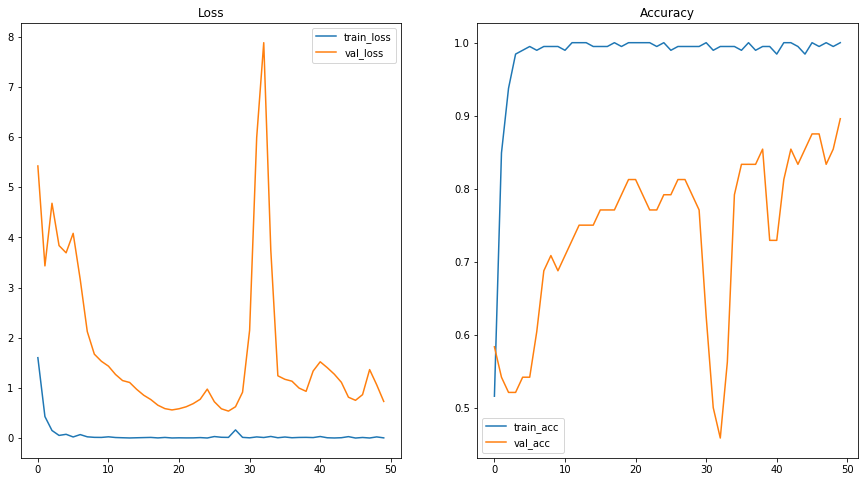

In [8]:
# plotting the loss and accuracy curve for each phase
train_loss = trained_model.history['loss']
val_loss = trained_model.history['val_loss']
train_acc = trained_model.history['accuracy']
val_acc = trained_model.history['val_accuracy']

epochs_range = range(epochs)

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(epochs_range,train_loss,label="train_loss")
plt.plot(epochs_range,val_loss,label="val_loss")
plt.legend(loc=0)
plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(epochs_range,train_acc,label="train_acc")
plt.plot(epochs_range,val_acc,label="val_acc")
plt.legend(loc=0)
plt.title("Accuracy")

plt.show()

In [11]:
# testing the model on the test set
model.evaluate(test_imgs,test_labels)

60/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.7437969048817952, 0.8833333]